In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [20]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [5]:
# sales.set_index("date", inplace = True)
# sales

In [5]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["revenue"].resample("D").sum()
sales_grouped = sales_grouped.reset_index(level = "store_id", drop = False)
sales_grouped

,store_id,revenue
date,,
2017-01-02,S0002,171.59
2017-01-03,S0002,178.10
2017-01-04,S0002,303.89
2017-01-05,S0002,274.65
2017-01-06,S0002,193.81
...,...,...
2019-10-27,S0143,0.00
2019-10-28,S0143,0.00
2019-10-29,S0143,0.00


In [7]:
sales_grouped = sales_grouped.fillna(0)
sales_grouped = sales_grouped["2017-01-02":"2019-09-29"]
sales_grouped

,store_id,revenue
date,,
2017-01-02,S0002,171.59
2017-01-03,S0002,178.10
2017-01-04,S0002,303.89
2017-01-05,S0002,274.65
2017-01-06,S0002,193.81
...,...,...
2019-09-25,S0143,57.65
2019-09-26,S0143,110.57
2019-09-27,S0143,86.03


In [8]:
sales_transposed = sales_grouped.pivot(columns='store_id', values='revenue')
sales_transposed = sales_transposed.fillna(0)
sales_transposed

store_id,S0002,S0003,S0005,S0007,S0010,S0012,S0014,S0015,S0016,S0020,...,S0109,S0120,S0122,S0126,S0131,S0132,S0136,S0141,S0142,S0143
date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,171.59,67.47,0.00,0.00,364.99,68.52,216.67,308.69,70.06,734.50,...,0.00,48.20,73.35,504.48,71.12,183.10,0.0,37.30,48.33,40.08
2017-01-03,178.10,97.54,0.00,0.00,343.87,93.71,98.55,140.29,45.91,656.90,...,0.00,30.44,78.13,172.37,154.24,237.04,0.0,32.10,100.52,41.86
2017-01-04,303.89,74.23,0.00,0.00,346.01,144.84,105.01,178.98,36.68,736.59,...,0.00,35.60,76.00,459.48,122.09,192.77,0.0,62.55,74.14,25.65
2017-01-05,274.65,88.00,0.00,0.00,277.86,154.03,121.77,293.44,59.49,859.45,...,0.00,107.39,109.36,347.52,90.25,193.60,0.0,40.05,115.41,51.02
2017-01-06,193.81,101.94,0.00,0.00,346.19,186.03,138.19,266.45,65.36,962.60,...,0.00,29.46,111.47,353.00,80.45,225.87,0.0,48.63,82.24,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,370.82,167.38,291.17,240.99,327.70,191.16,115.90,239.40,92.66,833.75,...,201.10,41.60,176.61,437.95,164.66,346.27,0.0,61.68,189.15,57.65
2019-09-26,300.44,168.95,118.58,117.68,637.51,195.10,172.71,442.76,157.50,2348.52,...,344.82,81.21,787.58,1151.05,456.19,766.63,0.0,23.39,316.21,110.57
2019-09-27,529.17,175.33,131.61,143.93,486.55,202.88,217.22,424.13,77.71,1716.11,...,367.71,66.53,280.71,683.95,360.28,296.33,0.0,60.26,384.23,86.03


In [108]:
# X = sales_transposed.values
scaler = StandardScaler()
sales_transposed_std = scaler.fit_transform(sales_transposed)
sales_transposed_std

array([[-0.64342769, -0.4054506 , -0.4473102 , ..., -0.26491819,
        -0.69793185, -0.37016894],
       [-0.62957582, -0.19980798, -0.4473102 , ..., -0.41937037,
        -0.45459567, -0.32469897],
       [-0.36192201, -0.35922033, -0.4473102 , ...,  0.48506596,
        -0.57759257, -0.73878221],
       ...,
       [ 0.11742492,  0.33218201,  0.1307067 , ...,  0.41704759,
         0.86820386,  0.80362038],
       [ 5.14495037,  0.8693011 ,  0.5919871 , ...,  1.01584682,
         0.64076682,  3.95024428],
       [ 1.03277585,  0.86287263,  0.47771007, ..., -1.37281557,
         0.68161037,  3.00738109]])

In [178]:
pca = PCA()
pca.fit(sales_transposed_std)

PCA()

In [179]:
pca.explained_variance_ratio_

array([0.5362727 , 0.05003071, 0.04228669, 0.0344802 , 0.02551697,
       0.01690833, 0.0157141 , 0.01477091, 0.01362996, 0.01329001,
       0.01297812, 0.01202265, 0.01115217, 0.01049733, 0.00971126,
       0.00896472, 0.00875944, 0.00840133, 0.00793806, 0.00766307,
       0.00740649, 0.00698397, 0.00663319, 0.00627161, 0.00577714,
       0.00556022, 0.00534798, 0.00510871, 0.00491733, 0.0048451 ,
       0.00459917, 0.00448993, 0.00418801, 0.00396221, 0.00372625,
       0.00364998, 0.00351531, 0.0033876 , 0.00324766, 0.00317547,
       0.00308021, 0.00279345, 0.00271891, 0.0026668 , 0.00261598,
       0.00250681, 0.00235822, 0.0021524 , 0.00204951, 0.0020055 ,
       0.0019286 , 0.00187027, 0.00171316, 0.00163859, 0.00154368,
       0.00144861, 0.00125355, 0.00121987, 0.00111466, 0.00104085,
       0.00091323, 0.00084494, 0.00074015])

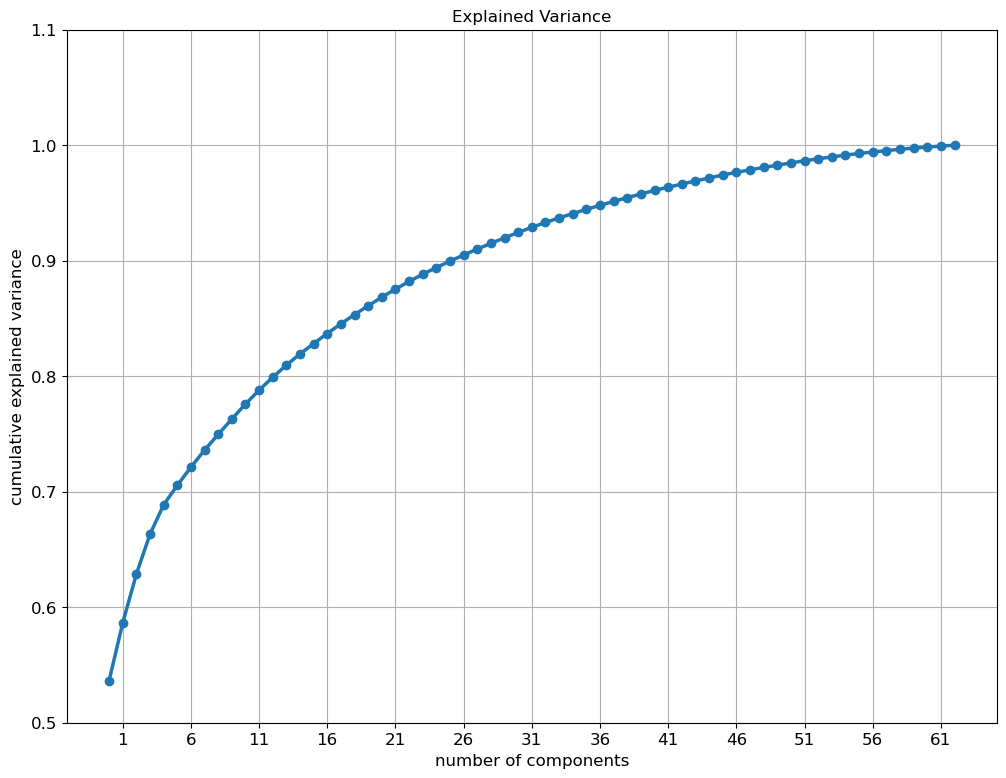

In [199]:
plt.figure(figsize=(12,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linewidth = 2.5)
plt.xlabel('number of components', fontsize = 12)
plt.ylabel('cumulative explained variance', fontsize = 12)
# Increase the number of xticks and yticks
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_), step=5), fontsize = 12)
plt.yticks(np.arange(0.5, 1.1, 0.1), fontsize = 12)
plt.grid()
plt.title("Explained Variance");

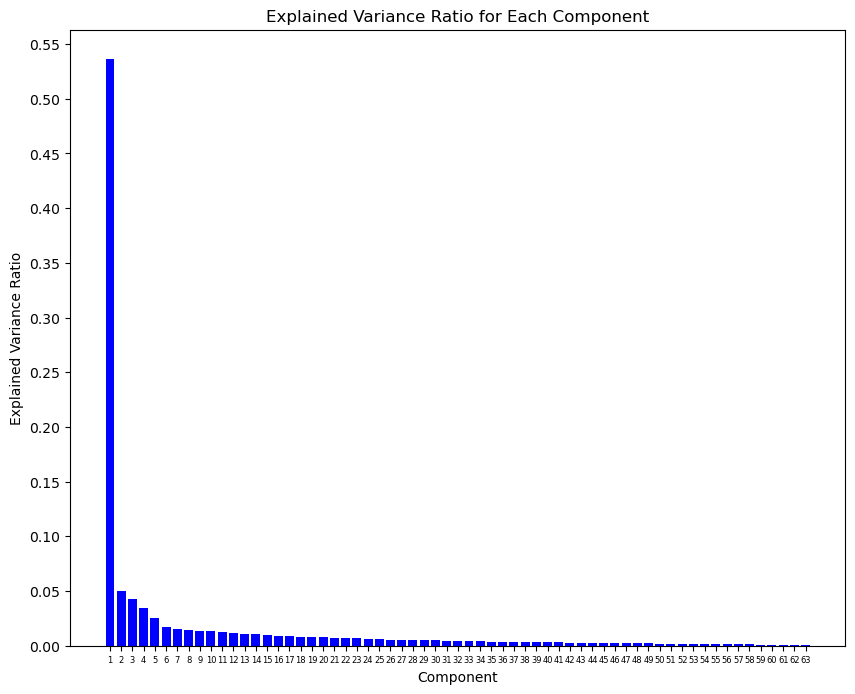

In [190]:
# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Component indices
component_indices = np.arange(len(explained_variance_ratio)) + 1

# Bar plot
plt.figure(figsize=(10, 8))
plt.bar(component_indices, explained_variance_ratio, color='blue')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.xticks(component_indices, fontsize = 6)
plt.yticks(np.arange(0, 0.6, 0.05))
plt.show()

In [129]:
n_components = 4
# Fit PCA with 4 components
pca = PCA(n_components)
pca.fit(sales_weekly_transposed_std)

# Get the principal components
principal_components = pca.components_

# Get the column names (store_ids)
store_ids = sales_weekly_transposed.columns

# Create a list to store the results
component_store_ids = []

# Iterate over the principal components
for i in range(n_components):
    # Get the indices of the stores with the highest loading in the current component
    component_loadings = principal_components[i]
    top_store_index = np.argmax(component_loadings)
    
    # Get the corresponding store_id
    top_store_id = store_ids[top_store_index]
    
    # Append the store_id to the list
    component_store_ids.append(top_store_id)

# Display the list of store IDs
print(component_store_ids)

['S0050', 'S0022', 'S0041', 'S0083']


In [222]:
# Filtered DataFrame with selected stores
selected_stores = ['S0050', 'S0022', 'S0041', 'S0083']
sales_grouped_filtered = sales_grouped[sales_grouped['store_id'].isin(selected_stores)]

In [256]:
sales_grouped_filtered

,store_id,revenue
date,,
2017-01-02,S0022,176.00
2017-01-03,S0022,217.39
2017-01-04,S0022,232.21
2017-01-05,S0022,234.18
2017-01-06,S0022,291.53
...,...,...
2019-09-25,S0083,100.65
2019-09-26,S0083,102.43
2019-09-27,S0083,47.37


In [250]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Reset the index of the sales_grouped_filtered DataFrame
sales_grouped_filtered_reset = sales_grouped_filtered.reset_index()

# Pivot the DataFrame to have store IDs as columns and revenue over time as values
data = sales_grouped_filtered_reset.pivot(index='date', columns='store_id', values='revenue')

# Select only the columns for the selected stores
data = data[selected_stores].values

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = clustering.fit_predict(scaled_data)

# Create a new DataFrame with store_id and cluster labels
store_clusters = pd.DataFrame({'store_id': sales_grouped_filtered['store_id'].unique(), 'cluster_label': cluster_labels[:len(sales_grouped_filtered['store_id'].unique())]})

# Merge the cluster labels with the original sales_grouped DataFrame
sales_grouped_with_clusters = pd.merge(sales_grouped_filtered, store_clusters, on='store_id')

sales_grouped_with_clusters

,store_id,revenue,cluster_label
0,S0022,176.00,2
1,S0022,217.39,2
2,S0022,232.21,2
3,S0022,234.18,2
4,S0022,291.53,2
...,...,...,...
3999,S0083,100.65,2
4000,S0083,102.43,2
4001,S0083,47.37,2
4002,S0083,93.94,2


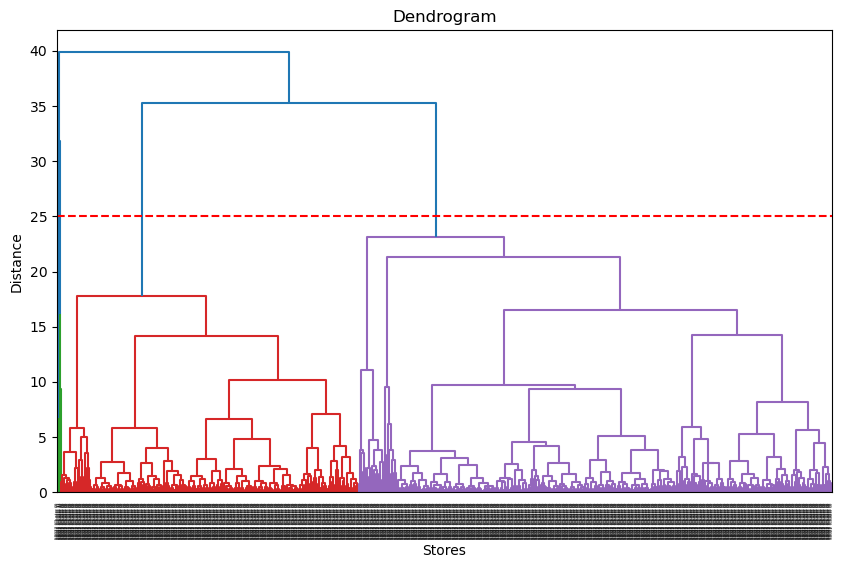

In [280]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
clustering = AgglomerativeClustering(linkage='average')
cluster_labels = clustering.fit_predict(scaled_data)

# Calculate the linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Create labels for the dendrogram based on the cluster labels
dendrogram_labels = [f'{store_id} (Cluster {label})' for store_id, label in zip(sales_grouped_filtered['store_id'], cluster_labels)]

# Define the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create a dendrogram
dendrogram(linkage_matrix, labels=dendrogram_labels)

# Add a horizontal line to indicate the cut line
cut_line = 25  # Adjust the value according to your needs
plt.axhline(y=cut_line, color='r', linestyle='--')

# Set labels and title
plt.xlabel('Stores')
plt.ylabel('Distance')
plt.title('Dendrogram')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize = 3)

# Show the plot
plt.show()

In [281]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Determine the number of clusters based on the cut line
clusters = fcluster(linkage_matrix, t=cut_line, criterion='distance')
num_clusters = len(set(clusters))

print(f"Number of clusters: {num_clusters}")

Number of clusters: 4


In [245]:
# Group sales_grouped_with_clusters by store_id and sum up revenue
grouped_clusters = sales_grouped_with_clusters.groupby('store_id')['revenue'].sum().reset_index()

# Merge the cluster labels with the grouped_clusters DataFrame
grouped_clusters = pd.merge(grouped_clusters, store_clusters, on='store_id')

# Print the resulting DataFrame
print(grouped_clusters)

  store_id    revenue  cluster_label
0    S0022  259944.42              2
1    S0041   34637.64              0
2    S0050  244616.79              2
3    S0083  114577.09              2


In [266]:
# Group sales_grouped_with_clusters by store_id and sum up revenue
grouped = sales_grouped_filtered.groupby('store_id')['revenue'].sum().reset_index()
grouped

,store_id,revenue
0,S0022,259944.42
1,S0041,34637.64
2,S0050,244616.79
3,S0083,114577.09


In [234]:
# Create a new DataFrame with store_id and cluster labels
store_ids = sales_grouped_filtered['store_id'].unique()
store_ids

array(['S0022', 'S0041', 'S0050', 'S0083'], dtype=object)

In [131]:
# Select the first six principal components
selected_components = pca.components_[:n_components]

# Convert the selected components to a DataFrame
components_df = pd.DataFrame(selected_components.T, columns=[f"Component {i+1}" for i in range(n_components)])

# Calculate the correlation matrix
correlation_matrix = components_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Component 1  Component 2  Component 3  Component 4
Component 1     1.000000     0.143453    -0.148671     0.001188
Component 2     0.143453     1.000000     0.001632    -0.000013
Component 3    -0.148671     0.001632     1.000000     0.000014
Component 4     0.001188    -0.000013     0.000014     1.000000


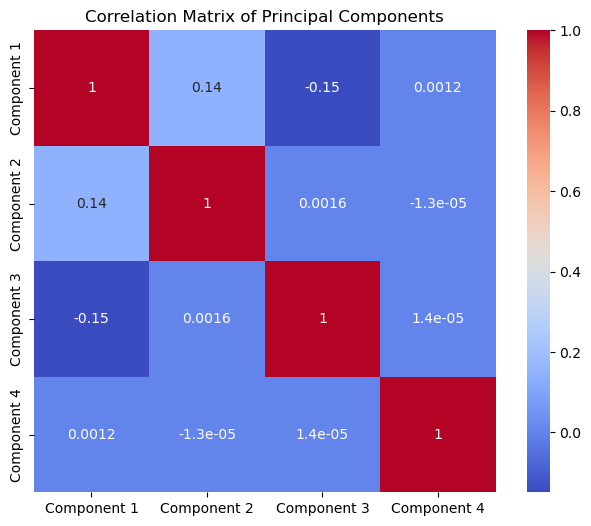

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Principal Components")
plt.show()

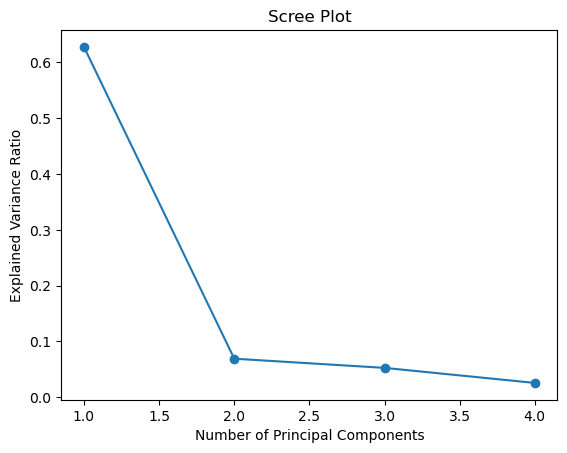

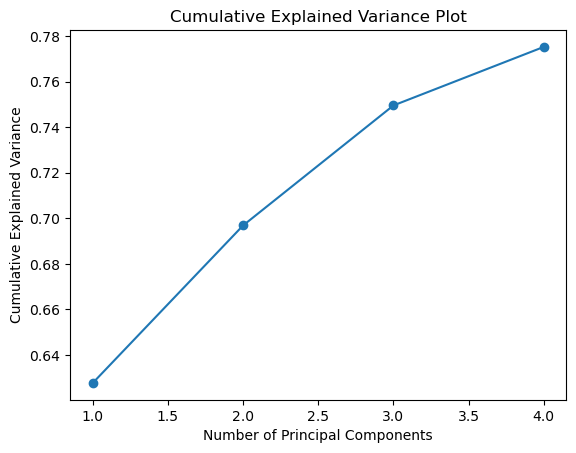

In [133]:
# Compute the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

Each value represents the proportion of variance explained by the corresponding principal component. For example, the first principal component explains approximately 53.63% of the total variance in the data. The second principal component explains around 5.00% of the variance, the third explains about 4.23%, and so on.

This information is useful for understanding the relative importance of each principal component in capturing the variation in the data. You can use it to decide how many principal components to retain based on the desired level of variance explained.

In [174]:
# Perform PCA with 4 components
pca = PCA(n_components)
principal_components = pca.fit_transform(sales_transposed)

# Access the transformed data and variance explained by each component
transformed_data = pca.transform(sales_transposed)
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each component
for i, variance in enumerate(explained_variance):
    print(f"Variance explained by Component {i+1}: {variance:.4f}")

Variance explained by Component 1: 0.7366
Variance explained by Component 2: 0.1854
Variance explained by Component 3: 0.0225
Variance explained by Component 4: 0.0153


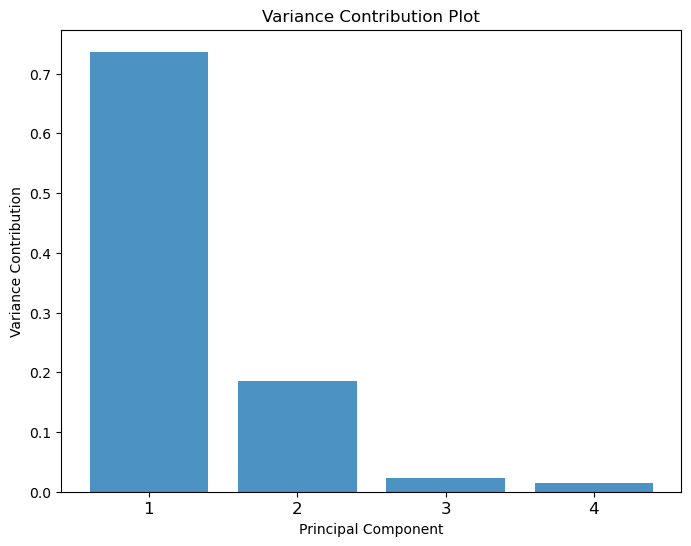

In [176]:
# Get the explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot of the variance contribution
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Contribution')
plt.title('Variance Contribution Plot')
plt.xticks(np.arange(1, len(explained_variance_ratio)+1, step=1), fontsize = 12)
plt.show()

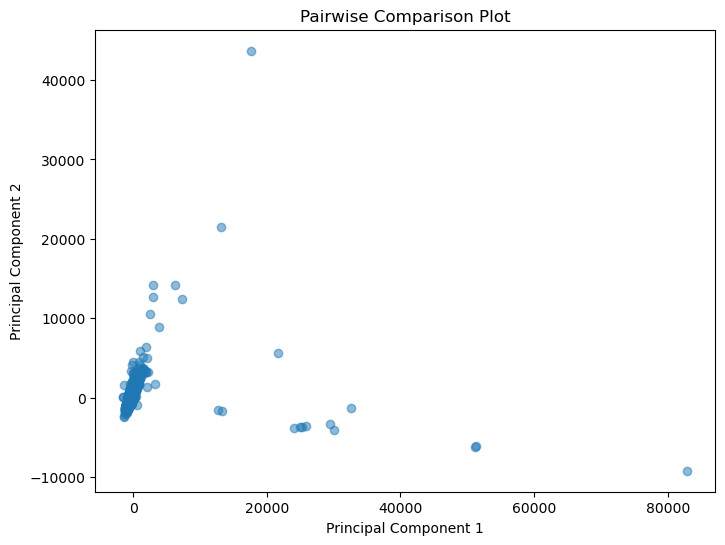

In [123]:
# Select two principal components for comparison
component1 = 1
component2 = 2

# Create a scatter plot of the variables against each other
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, component1-1], principal_components[:, component2-1], alpha=0.5)
plt.xlabel(f'Principal Component {component1}')
plt.ylabel(f'Principal Component {component2}')
plt.title('Pairwise Comparison Plot')
plt.show()

          S0050     S0022     S0041     S0083
S0050  1.000000  0.656863  0.351181 -0.031241
S0022  0.656863  1.000000  0.392172 -0.027013
S0041  0.351181  0.392172  1.000000  0.146753
S0083 -0.031241 -0.027013  0.146753  1.000000


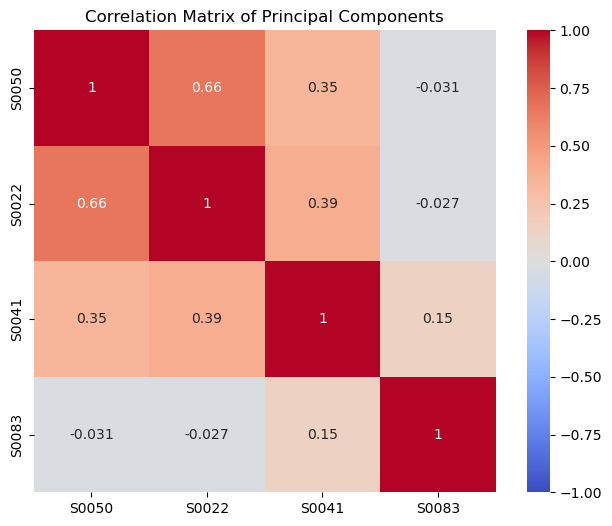

In [283]:
# Create a dataframe of the six principal components
principal_df = pd.DataFrame(principal_components[:, :6], columns=component_store_ids)

# Calculate the correlation matrix using Spearman correlation coefficient
correlation_matrix = principal_df.corr(method = "kendall")

# Display the correlation matrix
print(correlation_matrix)

# Normalize the correlation matrix to range from -1 to 1
normalized_corr_matrix = correlation_matrix / correlation_matrix.abs().max()

# Create the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of Principal Components')
plt.show()

In [25]:
cities

,store_id,storetype_id,store_size,city_id_old,country_id,city_code
0,S0036,ST04,21,C001,TURKEY,Denizli
1,S0005,ST04,19,C001,TURKEY,Denizli
2,S0104,ST04,47,C002,TURKEY,Ankara
3,S0068,ST03,14,C003,TURKEY,?zmir
4,S0086,ST03,12,C003,TURKEY,?zmir
...,...,...,...,...,...,...
58,S0040,ST04,42,C017,TURKEY,Kahramanmaras
59,S0046,ST04,26,C017,TURKEY,Kahramanmaras
60,S0102,ST04,27,C018,TURKEY,Erzurum
61,S0032,ST03,14,C019,TURKEY,Van


In [200]:
sales_completed = sales.merge(cities, how = "left", on="store_id")
sales_completed = sales_completed.merge(product, how ="left", on="product_id")

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_code,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
1188839,S0022,P0017,2017-01-02,0.0,0.00,20.0,1.49,PR14,NaN,PR03,...,Istanbul,8.0,28.0,8.0,cluster_6,H00,H0000,H000003,H00000310,H0000031001
1263073,S0022,P0366,2018-11-15,0.0,0.00,6.0,29.95,PR14,NaN,PR03,...,Istanbul,6.8,8.5,7.0,cluster_4,H00,H0002,H000206,H00020600,H0002060017
1263072,S0022,P0364,2018-11-15,7.0,8.75,18.0,1.35,PR14,NaN,PR03,...,Istanbul,4.0,4.0,12.5,cluster_0,H00,H0003,H000312,H00031200,H0003120017
1263071,S0022,P0362,2018-11-15,0.0,0.00,6.0,7.75,PR10,moderate,PR03,...,Istanbul,6.0,7.0,12.2,cluster_5,H00,H0002,H000200,H00020000,H0002000032
1263070,S0022,P0356,2018-11-15,0.0,0.00,27.0,3.00,PR14,NaN,PR03,...,Istanbul,2.0,6.0,10.0,cluster_3,H00,H0003,H000316,H00031609,H0003160922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919521,S0083,P0579,2018-01-21,0.0,0.00,4.0,3.50,PR14,NaN,PR03,...,Mersin,4.8,20.5,14.3,cluster_7,H01,H0105,H010500,H01050000,H0105000033
4919522,S0083,P0587,2018-01-21,0.0,0.00,8.0,3.99,PR14,NaN,PR03,...,Mersin,5.7,8.8,9.1,cluster_8,H01,H0107,H010700,H01070009,H0107000922
4919523,S0083,P0590,2018-01-21,0.0,0.00,25.0,0.60,PR14,NaN,PR03,...,Mersin,2.0,17.5,3.0,cluster_7,H00,H0002,H000200,H00020009,H0002000926
4919516,S0083,P0567,2018-01-21,0.0,0.00,6.0,12.90,PR14,NaN,PR03,...,Mersin,4.0,2.0,6.0,cluster_0,H03,H0313,H031302,H03130209,H0313020904


In [ ]:
sales_completed[sales_completed["store_id"].isin(component_store_ids)].sort_values(by=["store_id"])
sales_completed = sales_completed.drop(["promo_type_1","promo_bin_1","promo_type_2", "hierarchy1_id", "hierarchy2_id", "hierarchy3_id", "hierarchy4_id", "hierarchy4_id"], axis = 1)


In [206]:
store_id = ["S0022", "S0041"]
sales_completed[sales_completed["store_id"].isin(store_id)].sort_values(by=["store_id"])

,store_id,product_id,date,sales,revenue,stock,price,promo_bin_2,promo_discount_2,promo_discount_type_2,storetype_id,store_size,city_id_old,country_id,city_code,product_length,product_depth,product_width,cluster_id,hierarchy5_id
1188839,S0022,P0017,2017-01-02,0.0,0.00,20.0,1.49,NaN,NaN,NaN,ST04,16,C014,TURKEY,Istanbul,8.0,28.0,8.0,cluster_6,H0000031001
1263072,S0022,P0364,2018-11-15,7.0,8.75,18.0,1.35,NaN,NaN,NaN,ST04,16,C014,TURKEY,Istanbul,4.0,4.0,12.5,cluster_0,H0003120017
1263071,S0022,P0362,2018-11-15,0.0,0.00,6.0,7.75,NaN,NaN,NaN,ST04,16,C014,TURKEY,Istanbul,6.0,7.0,12.2,cluster_5,H0002000032
1263070,S0022,P0356,2018-11-15,0.0,0.00,27.0,3.00,NaN,NaN,NaN,ST04,16,C014,TURKEY,Istanbul,2.0,6.0,10.0,cluster_3,H0003160922
1263069,S0022,P0348,2018-11-15,5.0,14.26,5.0,3.50,NaN,NaN,NaN,ST04,16,C014,TURKEY,Istanbul,7.4,15.3,12.9,cluster_0,H0001021012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623926,S0041,P0044,2018-01-02,0.0,0.00,8.0,6.90,NaN,NaN,NaN,ST03,8,C013,TURKEY,Samsun,1.0,10.0,5.0,cluster_0,H0315041121
2623927,S0041,P0051,2018-01-02,3.0,1.94,59.0,0.70,NaN,NaN,NaN,ST03,8,C013,TURKEY,Samsun,1.7,17.5,4.5,cluster_7,H0003140912
2623928,S0041,P0079,2018-01-02,0.0,0.00,10.0,2.60,NaN,NaN,NaN,ST03,8,C013,TURKEY,Samsun,2.0,13.0,6.0,cluster_5,H0003160001
2623910,S0041,P0435,2018-01-01,0.0,0.00,11.0,27.25,NaN,NaN,NaN,ST03,8,C013,TURKEY,Samsun,1.0,4.0,10.0,cluster_0,H0106011422


In [137]:
print(component_store_ids)
cities[cities["store_id"].isin(component_store_ids)].sort_values(by=["store_id"])

['S0050', 'S0022', 'S0041', 'S0083']


,store_id,storetype_id,store_size,city_id_old,country_id,city_code
51,S0022,ST04,16,C014,TURKEY,Istanbul
23,S0041,ST03,8,C013,TURKEY,Samsun
55,S0050,ST04,31,C014,TURKEY,Istanbul
19,S0083,ST04,23,C010,TURKEY,Mersin


In [194]:
sales_merged = sales_grouped.merge(cities, how = "left", on = "store_id")
sales_merged

,store_id,revenue,storetype_id,store_size,city_id_old,country_id,city_code
0,S0002,171.59,ST04,39,C007,TURKEY,Adana
1,S0002,178.10,ST04,39,C007,TURKEY,Adana
2,S0002,303.89,ST04,39,C007,TURKEY,Adana
3,S0002,274.65,ST04,39,C007,TURKEY,Adana
4,S0002,193.81,ST04,39,C007,TURKEY,Adana
...,...,...,...,...,...,...,...
58047,S0143,57.65,ST03,13,C014,TURKEY,Istanbul
58048,S0143,110.57,ST03,13,C014,TURKEY,Istanbul
58049,S0143,86.03,ST03,13,C014,TURKEY,Istanbul
58050,S0143,209.21,ST03,13,C014,TURKEY,Istanbul


In [8]:
sales_sum = sales_grouped.groupby("store_id").sum()
sales_sum = sales_sum.reset_index()
# sales_sum_cut = sales_sum[sales_sum["store_id"].isin(component_store_ids)]
# sales_sum_cut.set_index("store_id", inplace = True)
# sales_sum.set_index("store_id", inplace = True)

In [25]:
sales_product = sales.groupby('store_id')['product_id'].nunique().reset_index()
sales_product.set_index("store_id", inplace = True)
sales_product

,product_id
store_id,
S0002,416
S0003,145
S0005,207
S0007,125
S0010,246
...,...
S0132,390
S0136,105
S0141,118


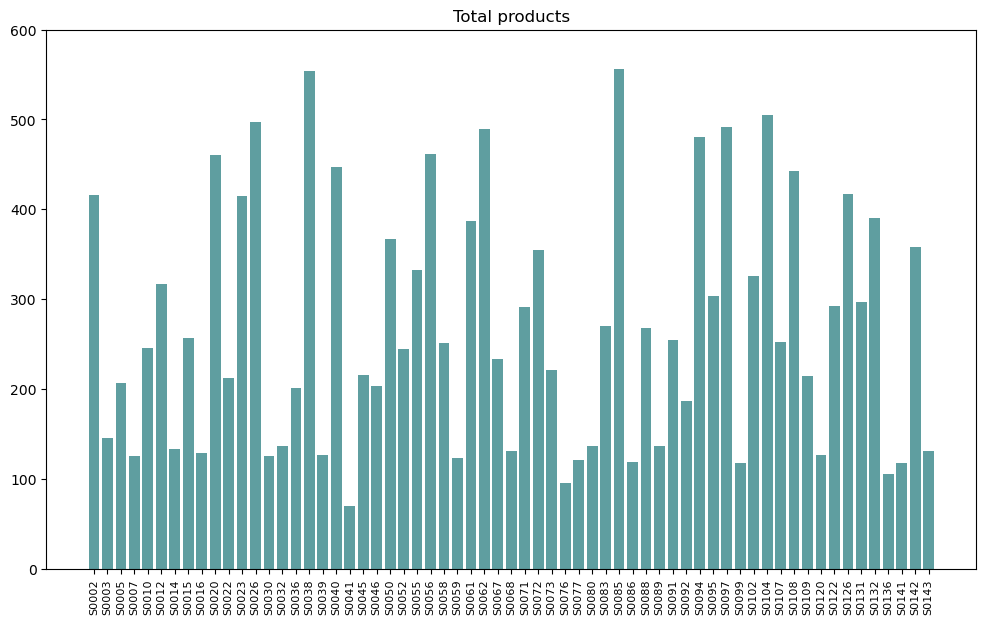

In [35]:
fig = plt.figure(figsize = (12,7))
plt.bar(sales_product.index, sales_product["product_id"], color = "cadetblue")
# plt.bar(sales_sum_cut.index, sales_sum_cut["revenue"])
plt.title("Total products")
plt.ylim(0, 600)
plt.xticks(sales_product.index, rotation='vertical', fontsize = "8");

In [10]:
sales_sum = sales_sum.set_index("store_id")
sales_sum

,revenue
store_id,
S0002,474820.67
S0003,126986.41
S0005,102060.55
S0007,21828.81
S0010,347469.40
...,...
S0132,306750.30
S0136,27607.54
S0141,46301.57


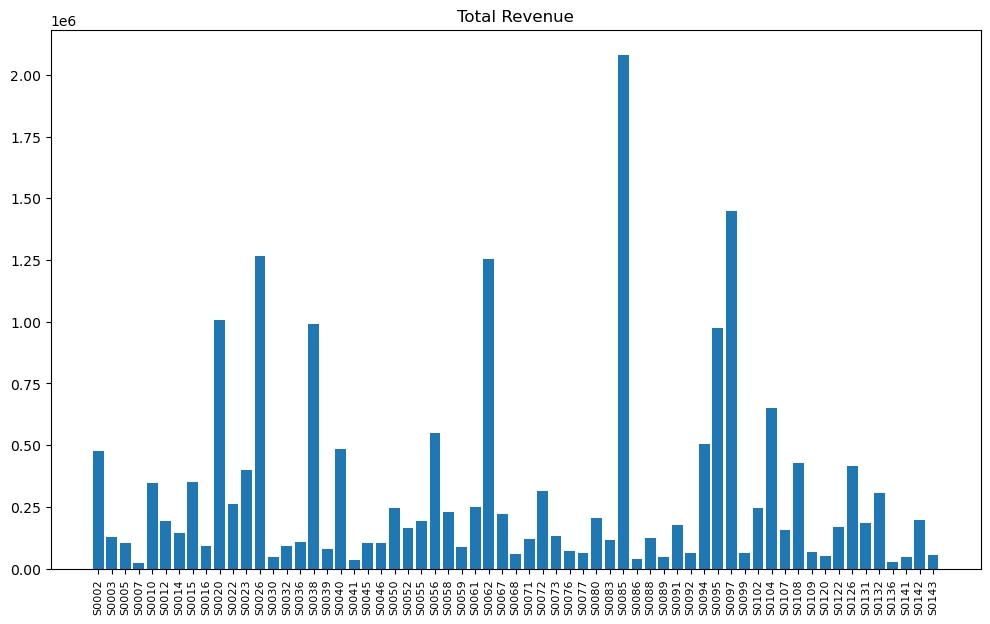

In [17]:
fig = plt.figure(figsize = (12,7))
plt.bar(sales_sum.index, sales_sum["revenue"])
# plt.bar(sales_sum_cut.index, sales_sum_cut["revenue"])
plt.title("Total Revenue")
plt.xticks(sales_sum.index, rotation='vertical', fontsize = "8");

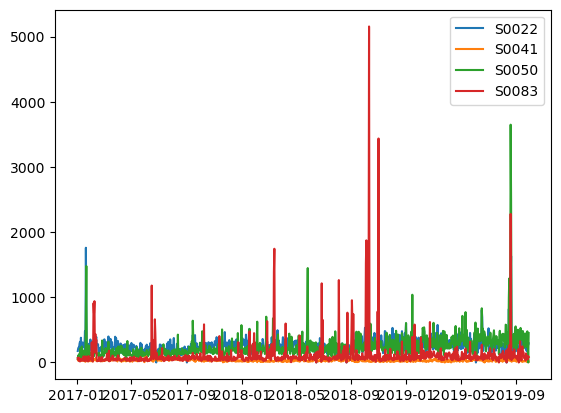

In [141]:
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0022"].loc[:,"revenue"], label = "S0022")
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0041"].loc[:,"revenue"], label = "S0041")
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0050"].loc[:,"revenue"], label = "S0050")
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0083"].loc[:,"revenue"], label = "S0083")
plt.legend(loc='best');

In [142]:
sales_sum

,revenue
store_id,
S0002,474457.47
S0003,126883.59
S0005,101950.94
S0007,21746.68
S0010,346971.60
...,...
S0132,306331.81
S0136,27607.54
S0141,46265.32


# Use weekly sales instead

In [143]:
sales_weekly = sales.set_index('date').groupby('store_id')["revenue"].resample("W").sum()
sales_weekly = sales_weekly.reset_index(level = "store_id", drop = False)
sales_weekly

,store_id,revenue
date,,
2017-01-08,S0002,1813.24
2017-01-15,S0002,1896.91
2017-01-22,S0002,7404.16
2017-01-29,S0002,2078.39
2017-02-05,S0002,1745.47
...,...,...
2019-10-06,S0143,80.82
2019-10-13,S0143,0.00
2019-10-20,S0143,0.00


In [144]:
sales_weekly = sales_weekly.fillna(0)
sales_weekly = sales_weekly["2017-01-02":"2019-09-29"]
sales_weekly

,store_id,revenue
date,,
2017-01-08,S0002,1813.24
2017-01-15,S0002,1896.91
2017-01-22,S0002,7404.16
2017-01-29,S0002,2078.39
2017-02-05,S0002,1745.47
...,...,...
2019-09-01,S0143,629.58
2019-09-08,S0143,915.27
2019-09-15,S0143,507.08


In [145]:
sales_weekly_transposed = sales_weekly.pivot(columns='store_id', values='revenue')
sales_weekly_transposed = sales_weekly_transposed.fillna(0)
sales_weekly_transposed

store_id,S0002,S0003,S0005,S0007,S0010,S0012,S0014,S0015,S0016,S0020,...,S0109,S0120,S0122,S0126,S0131,S0132,S0136,S0141,S0142,S0143
date,,,,,,,,,,,,,,,,,,,,,
2017-01-08,1813.24,546.47,0.00,0.00,2475.73,814.01,993.04,1836.18,383.81,5425.20,...,0.00,325.49,701.85,2411.48,742.32,1721.17,0.00,225.35,632.62,324.74
2017-01-15,1896.91,616.72,0.00,0.00,2253.98,687.39,1095.39,1820.12,443.74,5513.45,...,0.00,359.36,617.95,1973.28,800.89,1487.98,0.00,181.40,701.95,283.71
2017-01-22,7404.16,1534.22,0.00,0.00,4756.89,2015.91,1773.96,4993.79,776.21,15843.21,...,0.00,646.64,1645.00,6660.95,1896.56,4759.32,0.00,339.02,2799.25,439.47
2017-01-29,2078.39,712.18,0.00,0.00,2073.69,684.00,765.66,1752.82,547.75,5227.45,...,0.00,284.25,653.81,1852.80,785.24,1193.41,0.00,264.07,869.88,369.49
2017-02-05,1745.47,731.45,0.00,0.00,2225.48,1144.61,916.63,1806.40,455.07,4370.59,...,0.00,397.29,555.82,1691.91,906.73,1553.15,0.00,256.18,910.30,324.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,4164.56,1030.02,1177.18,867.30,2947.91,1349.81,1134.12,2545.12,587.25,9500.83,...,1765.57,373.66,1981.88,2607.85,1759.18,2754.96,657.46,237.38,1237.43,629.58
2019-09-08,6267.91,1302.61,1090.34,685.84,2749.20,1937.03,1389.82,2759.73,698.55,9153.79,...,1530.94,404.31,1992.27,3498.69,1735.58,3060.24,417.52,493.93,1281.46,915.27
2019-09-15,5007.57,1255.40,1239.80,892.32,2851.46,1965.89,1482.46,2664.79,905.45,9709.70,...,1425.80,615.17,1595.49,3408.88,1934.09,3712.46,0.00,315.22,1712.55,507.08


In [146]:
scaler = StandardScaler()
sales_weekly_transposed_std = scaler.fit_transform(sales_weekly_transposed)
sales_weekly_transposed_std

array([[-0.80936927, -0.63404227, -0.76945191, ..., -1.07160398,
        -0.9441959 , -0.39213026],
       [-0.76436201, -0.50335614, -0.76945191, ..., -1.55128637,
        -0.85732239, -0.67313176],
       [ 2.1980648 ,  1.20346978, -0.76945191, ...,  0.16902167,
         1.77068579,  0.39361925],
       ...,
       [ 0.90890552,  0.68478073,  0.56861527, ..., -0.09073808,
         0.4090034 ,  0.85665876],
       [-0.1308876 ,  0.84802212,  0.451073  , ...,  1.13318873,
         0.51155248,  1.50420182],
       [ 1.29656937,  0.61100121,  0.59881298, ...,  0.17873537,
         0.60179667,  2.21125995]])

In [147]:
pca_weekly = PCA()
pca_weekly.fit(sales_weekly_transposed_std)

PCA()

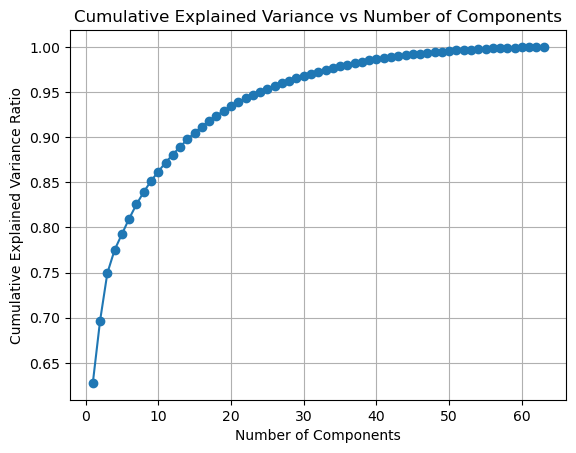

In [148]:
# Apply PCA
pca = PCA()  # Initialize PCA without specifying the number of components
pca_result = pca.fit_transform(sales_weekly_transposed_std)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [154]:
# Get the loadings of the principal components
loadings = pca.components_[:4, :]

# Create a DataFrame to store the store IDs and their corresponding loadings
component_loadings = pd.DataFrame(loadings.T, index=sales_weekly_transposed.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Print the top 5 stores contributing to each principal component
for component in component_loadings.columns:
    top_contributors = component_loadings.nlargest(5, component)
    print(f"Top 5 contributors to {component}:")
    print(top_contributors)
    print()

Top 5 contributors to PC1:
               PC1       PC2       PC3       PC4
store_id                                        
S0050     0.151251 -0.044626  0.033901 -0.065230
S0132     0.150830  0.046094  0.073742  0.000305
S0131     0.148406  0.030802  0.066104  0.006154
S0104     0.147620 -0.000665  0.034204 -0.024936
S0015     0.146999  0.095778  0.080908 -0.037535

Top 5 contributors to PC2:
               PC1       PC2       PC3       PC4
store_id                                        
S0022     0.109606  0.232649 -0.120019 -0.109067
S0052     0.110568  0.191723  0.152670  0.059422
S0126     0.112078  0.187729  0.033245 -0.027076
S0107     0.130872  0.171209  0.109704  0.039837
S0058     0.132127  0.167707  0.129780 -0.112227

Top 5 contributors to PC3:
               PC1       PC2       PC3       PC4
store_id                                        
S0041    -0.041936 -0.137823  0.336785 -0.034818
S0136     0.054822 -0.332564  0.252362  0.006680
S0099     0.068968 -0.309723  0.249

In [150]:
# Get the loadings of the principal components
loadings = pca.components_[:4, :]

# Create a DataFrame to store the store IDs and their corresponding loadings
component_loadings = pd.DataFrame(loadings.T, index=sales_weekly_transposed.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Get the store with the highest loading for each principal component
top_store_per_component = component_loadings.idxmax()

print("Store IDs for the first three principal components:")
for component, store_id in top_store_per_component.iteritems():
    print(f"{component}: {store_id}")

Store IDs for the first three principal components:
PC1: S0050
PC2: S0022
PC3: S0041
PC4: S0083


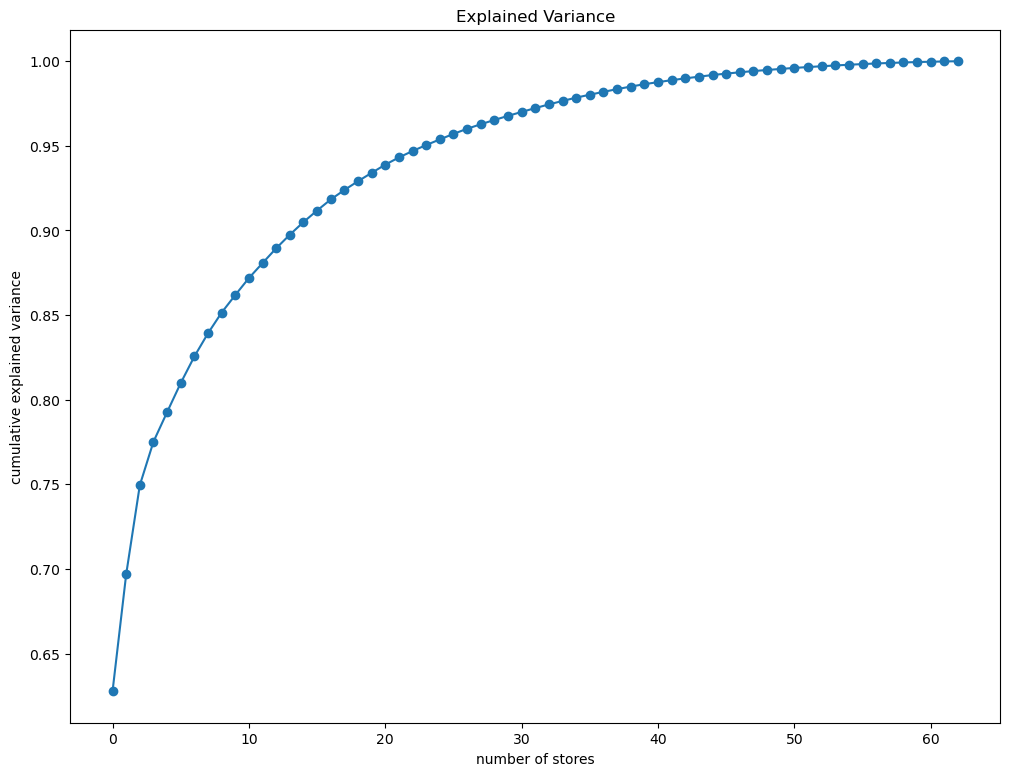

In [151]:
plt.figure(figsize=(12,9))
plt.plot(np.cumsum(pca_weekly.explained_variance_ratio_), marker='o')
plt.xlabel('number of stores')
plt.ylabel('cumulative explained variance')
plt.title("Explained Variance");

In [152]:
component_index = 0  # Index of the first principal component
store_index = np.argmax(pca_weekly.components_[component_index])
store_id = sales_weekly_transposed.columns[store_index]
print("Store corresponding to the first principal component:", store_id)

Store corresponding to the first principal component: S0050


In [70]:
pca_weekly = PCA(n_components = 0.7)
X_pca = pca_weekly.fit_transform(sales_weekly_transposed_std) # this will fit and reduce dimensions
pca_weekly.n_components_ # one can print and see how many components are selected

3

In [71]:
# Perform PCA with 3 components
pca_weekly = PCA(n_components=3)
principal_components = pca_weekly.fit_transform(sales_weekly_transposed)

# Access the transformed data and variance explained by each component
transformed_data = pca_weekly.transform(sales_weekly_transposed)
explained_variance = pca_weekly.explained_variance_ratio_

# Print the variance explained by each component
for i, variance in enumerate(explained_variance):
    print(f"Variance explained by Component {i+1}: {variance:.4f}")

Variance explained by Component 1: 0.5722
Variance explained by Component 2: 0.3203
Variance explained by Component 3: 0.0342


In [153]:
n_pcs= pca_weekly.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_weekly.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = sales_weekly_transposed.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

most_important_names

['S0050',
 'S0136',
 'S0041',
 'S0083',
 'S0083',
 'S0097',
 'S0095',
 'S0097',
 'S0077',
 'S0041',
 'S0097',
 'S0005',
 'S0143',
 'S0077',
 'S0077',
 'S0052',
 'S0045',
 'S0016',
 'S0120',
 'S0086',
 'S0059',
 'S0012',
 'S0122',
 'S0014',
 'S0059',
 'S0089',
 'S0055',
 'S0059',
 'S0052',
 'S0142',
 'S0039',
 'S0056',
 'S0088',
 'S0005',
 'S0002',
 'S0012',
 'S0023',
 'S0039',
 'S0085',
 'S0080',
 'S0046',
 'S0067',
 'S0010',
 'S0038',
 'S0073',
 'S0023',
 'S0094',
 'S0092',
 'S0088',
 'S0020',
 'S0058',
 'S0076',
 'S0107',
 'S0050',
 'S0020',
 'S0015',
 'S0132',
 'S0108',
 'S0067',
 'S0109',
 'S0092',
 'S0132',
 'S0076']